In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

# generate a daily signal covering one year 2016 in a pandas dataframe
N = 360
df_train = pd.DataFrame({"Date" : pd.date_range(start="2016-01-25", periods=N, freq='D'),
                         "Signal" : (np.arange(N)//40 + np.arange(N) % 21 + np.random.randn(N))})


In [2]:
df_train.head(12)

,Date,Signal
0,2016-01-25,1.291529
1,2016-01-26,1.969644
2,2016-01-27,2.366749
3,2016-01-28,4.142197
4,2016-01-29,2.957869
5,2016-01-30,5.160070
6,2016-01-31,6.263883
7,2016-02-01,6.071141
8,2016-02-02,8.040411
9,2016-02-03,7.657530


In [3]:
df_train.tail(12)

,Date,Signal
348,2017-01-07,20.279259
349,2017-01-08,20.428703
350,2017-01-09,22.356405
351,2017-01-10,21.821679
352,2017-01-11,23.755857
353,2017-01-12,24.726401
354,2017-01-13,26.748023
355,2017-01-14,28.593071
356,2017-01-15,29.491719
357,2017-01-16,8.289580


<AxesSubplot:xlabel='Date'>

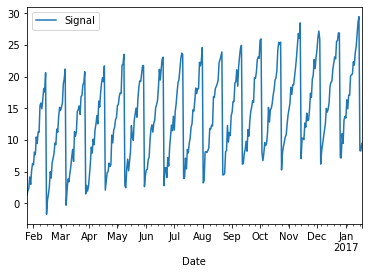

In [4]:
df_train.plot('Date' , ['Signal'])

In [5]:

import pyaf.ForecastEngine as autof
# create a forecast engine. This is the main object handling all the operations
lEngine = autof.cForecastEngine()

# get the best time series model for predicting one week
lEngine.train(iInputDS = df_train, iTime = 'Date', iSignal = 'Signal', iHorizon = 7);
lEngine.getModelInfo() # => relative error 7% (MAPE)


INFO:pyaf.std:START_TRAINING 'Signal'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['Signal']' 3.3868408203125
INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2016-01-25T00:00:00.000000 TimeMax=2016-11-01T00:00:00.000000 TimeDelta=<DateOffset: days=1> Horizon=7
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Signal' Length=360  Min=-1.767010040021706 Max=29.491719163924813  Mean=13.846098166520182 StdDev=6.75840203984296
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Signal' Min=-1.767010040021706 Max=29.491719163924813  Mean=13.846098166520182 StdDev=6.75840203984296
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64)' [ConstantTrend + NoCycle + AR]
INFO:pyaf.std:TREND_DETAIL '_Signal_ConstantTrend' [ConstantTrend]
INFO:pyaf.std:CYCLE_DETAIL '_Signal_ConstantTrend_residue_zeroCycle' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64)' 

INFO:pyaf.std:START_PLOTTING
INFO:pyaf.std:END_PLOTTING_TIME_IN_SECONDS 1.9292376041412354


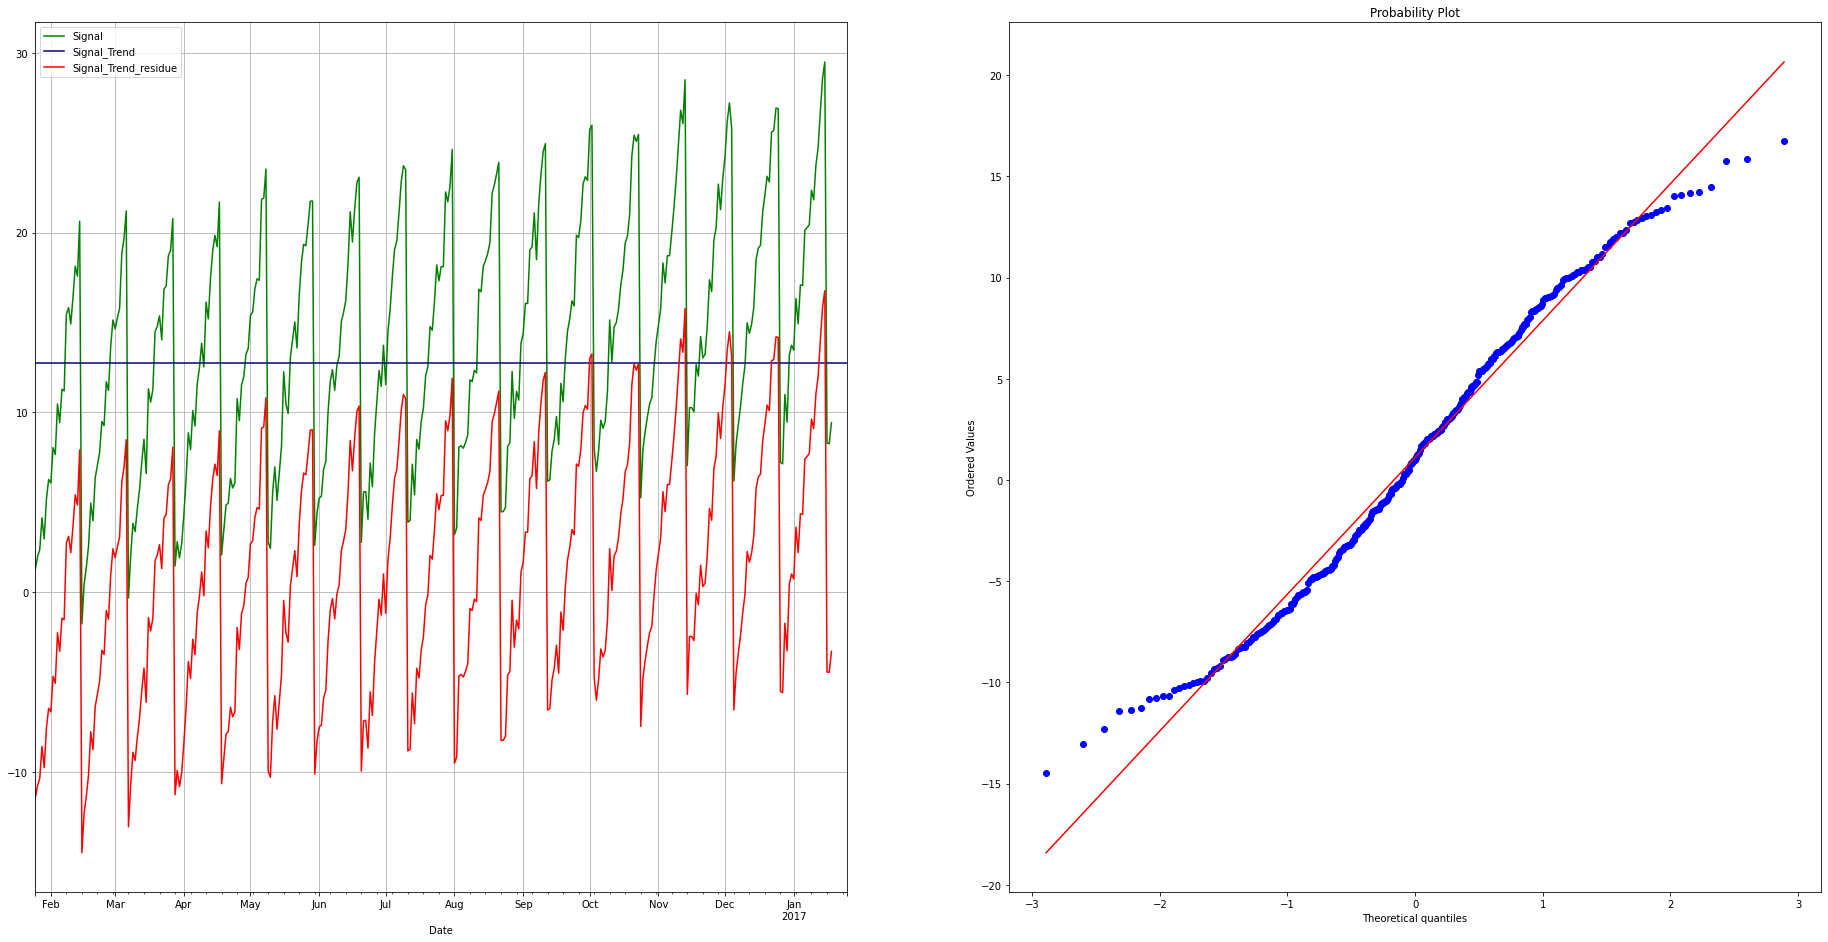

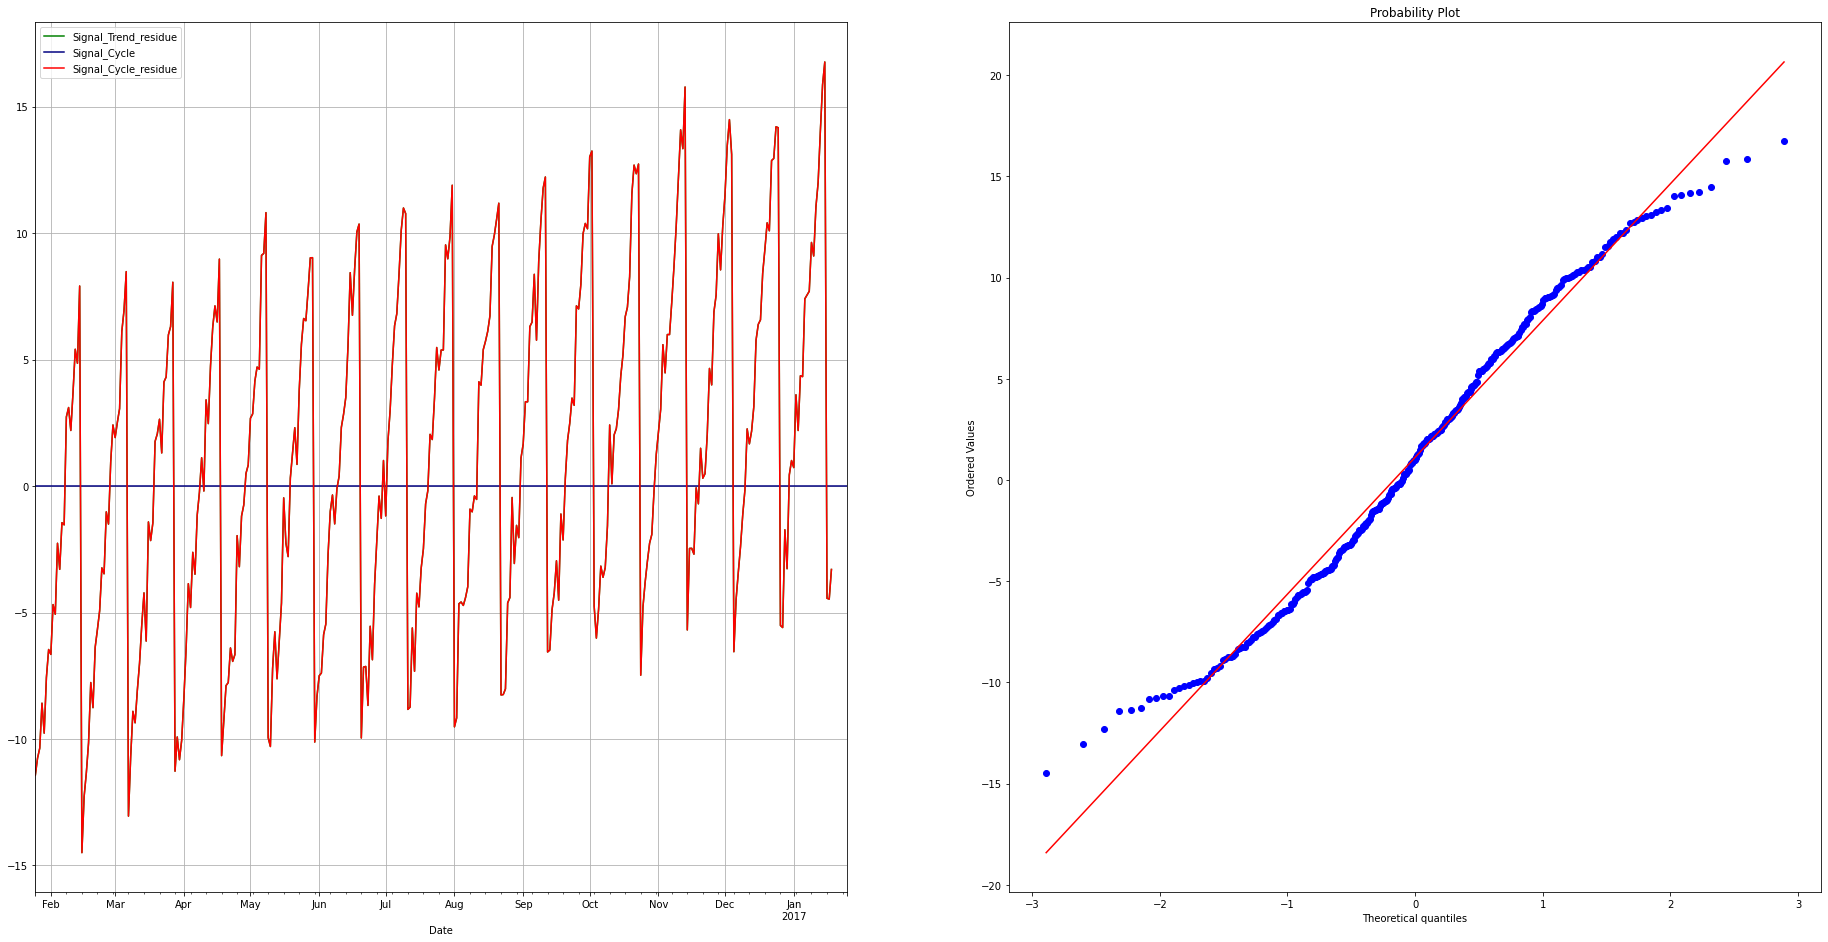

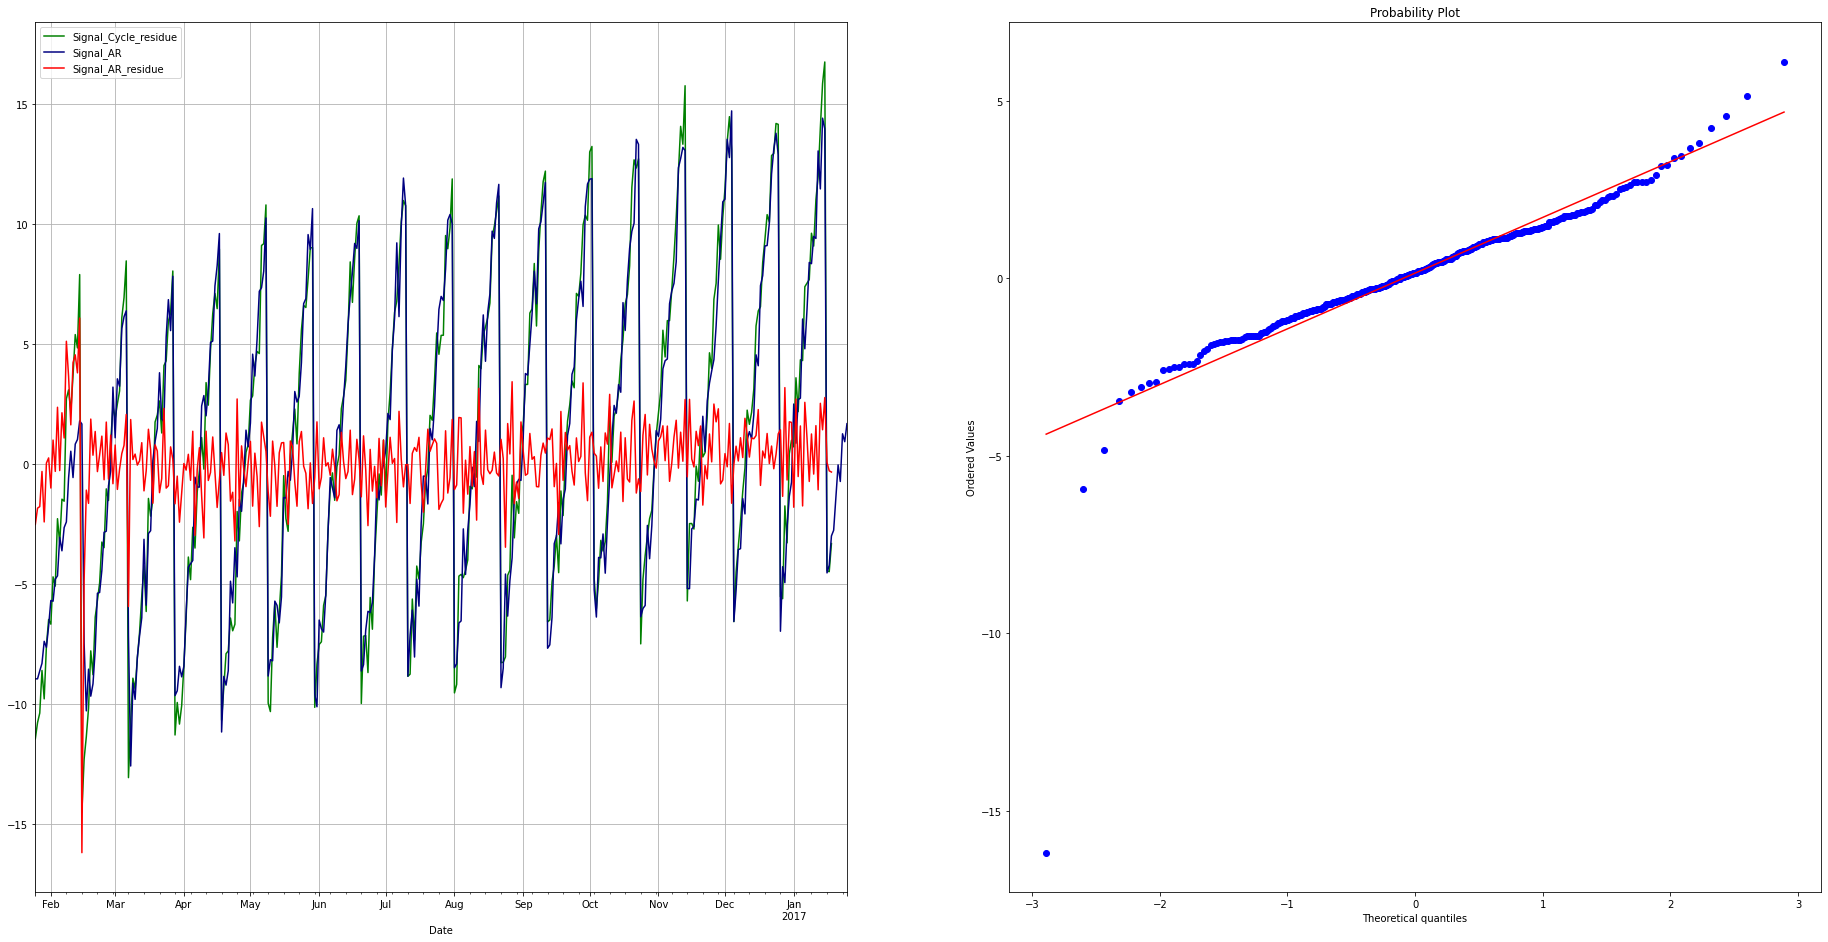

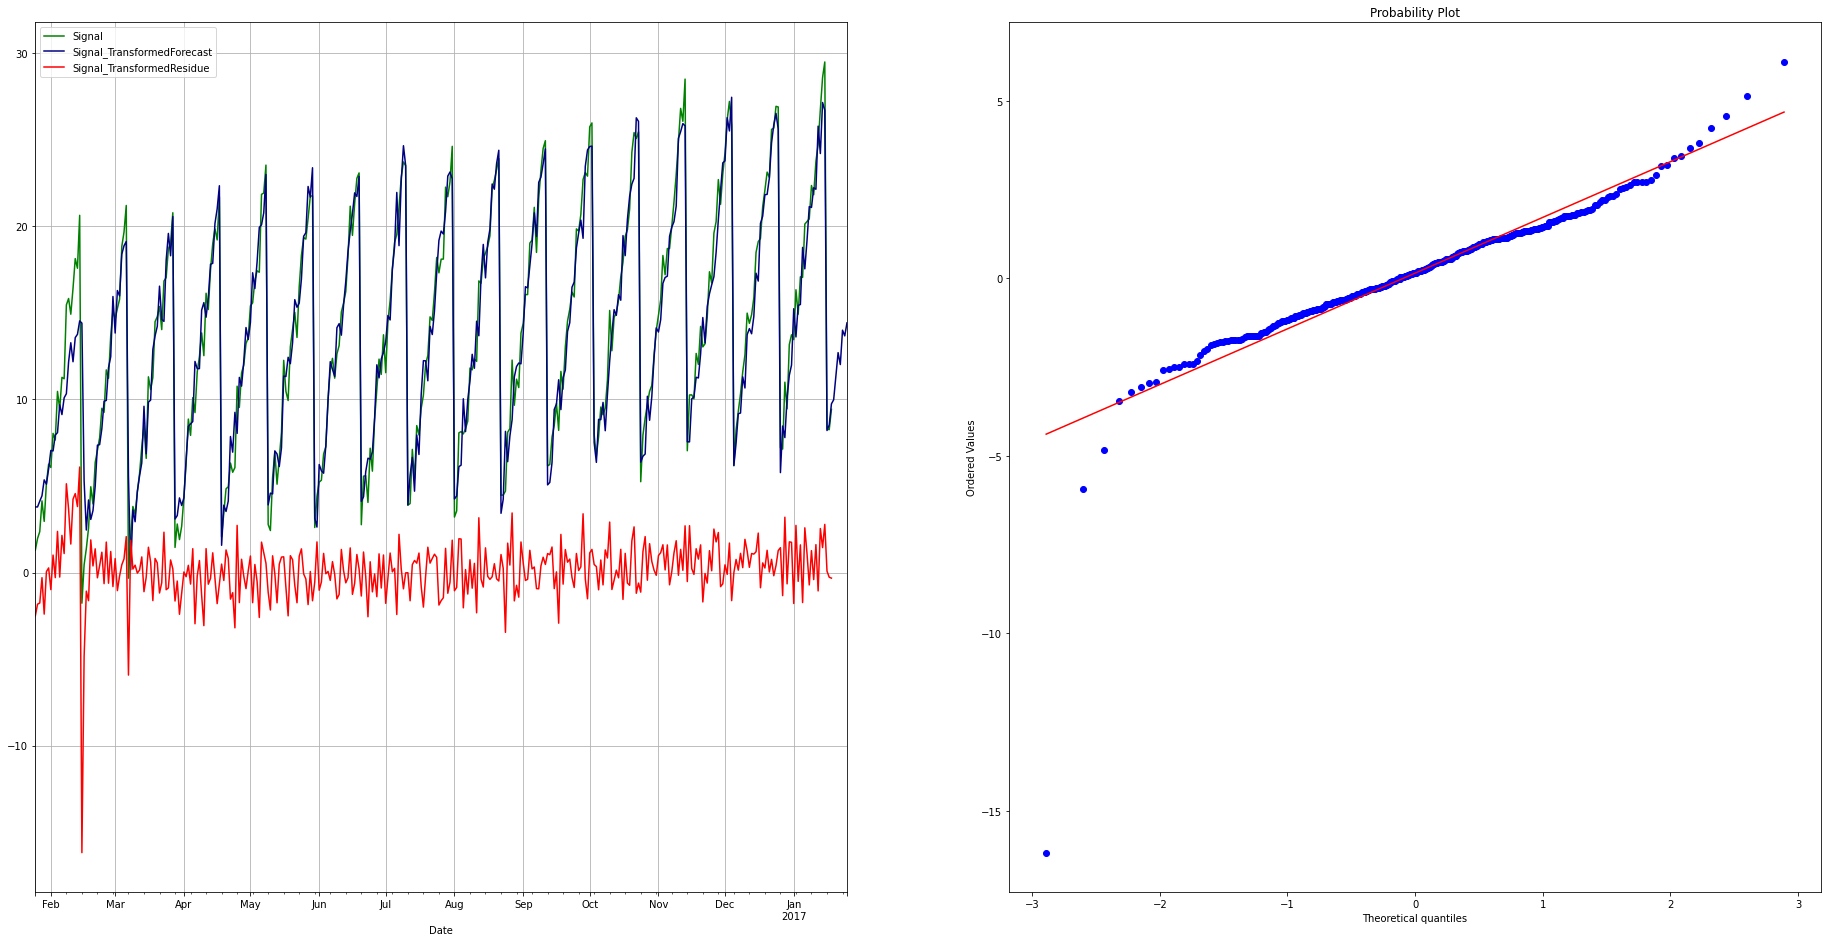

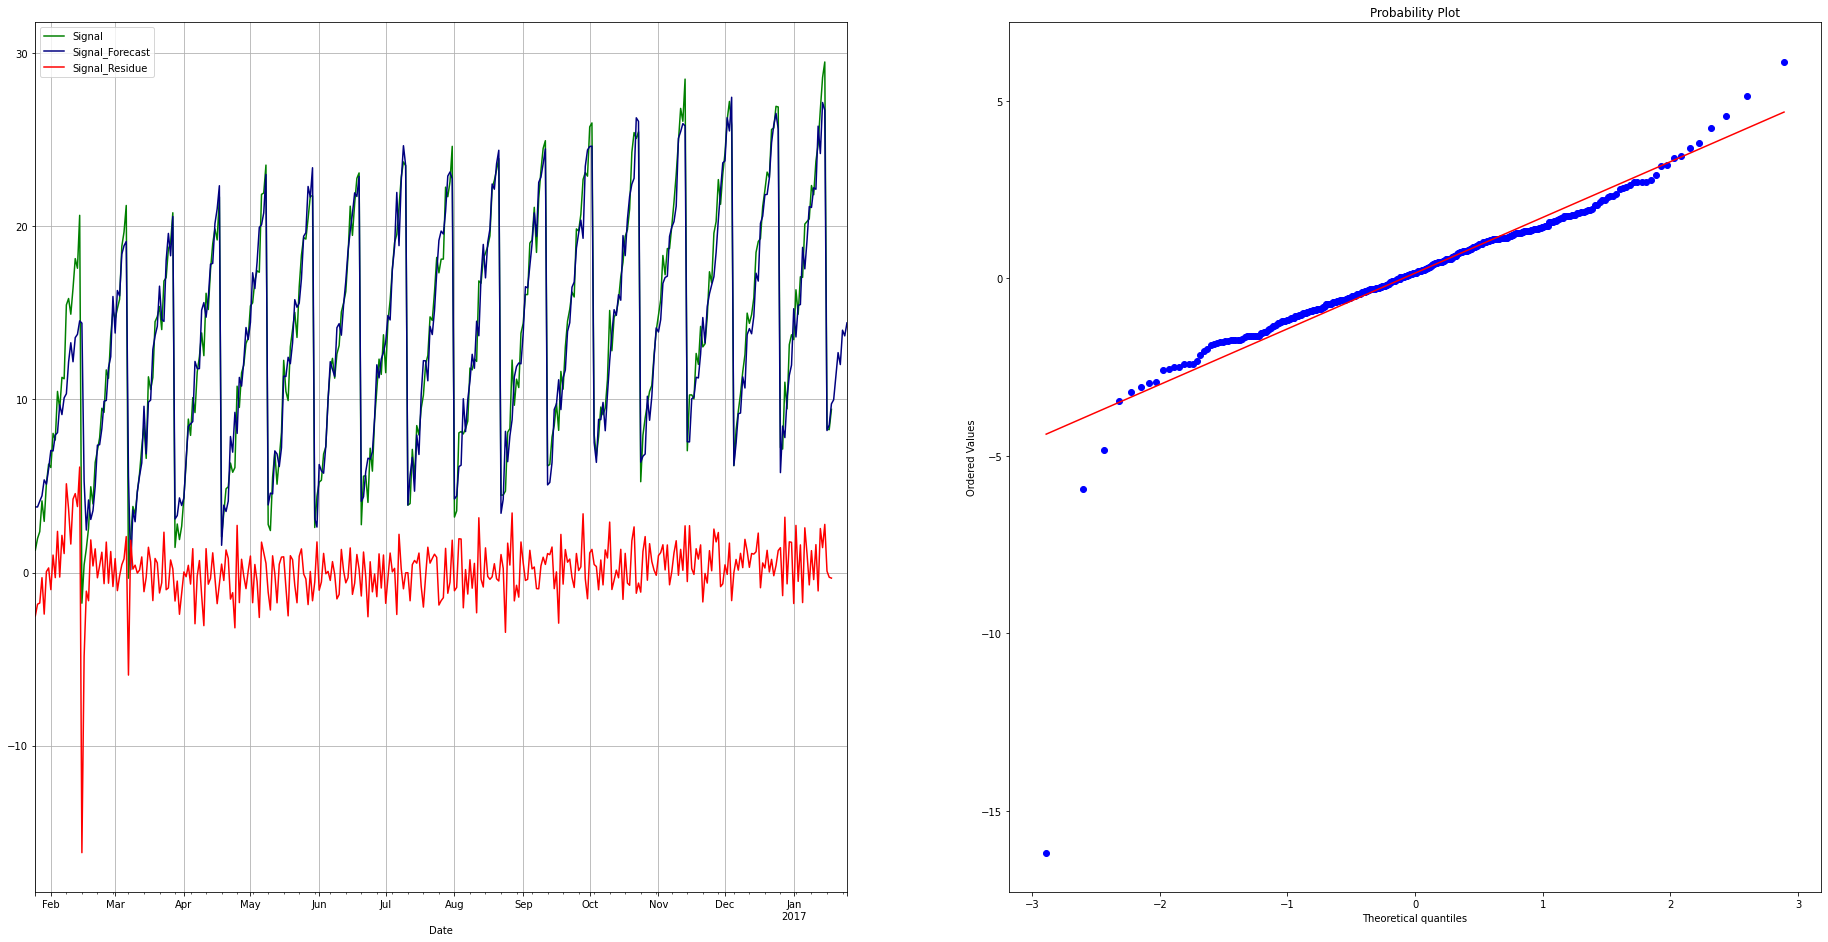

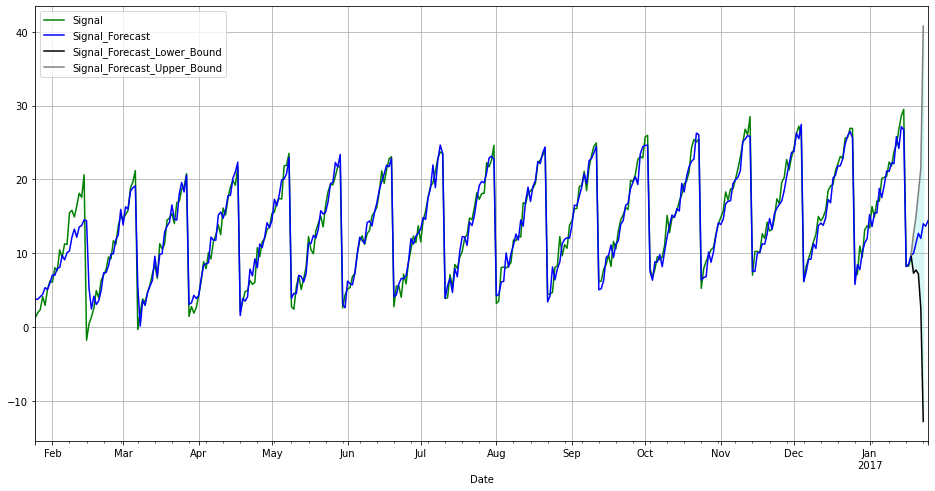

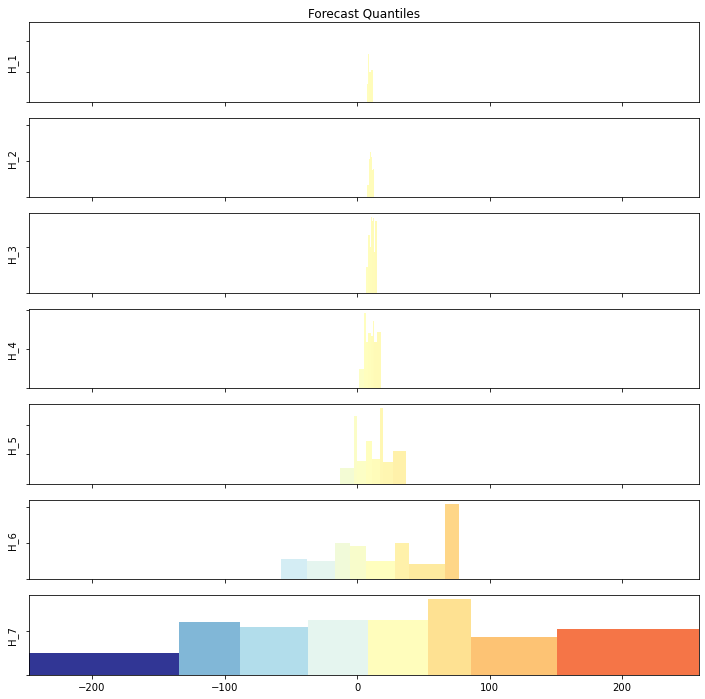

In [6]:
lEngine.standardPlots()

In [7]:

# predict one week
df_forecast = lEngine.forecast(iInputDS = df_train, iHorizon = 7)
# list the columns of the forecast dataset
print(df_forecast.columns) #

# print the real forecasts
# Future dates : ['2017-01-19T00:00:00.000000000' '2017-01-20T00:00:00.000000000' '2017-01-21T00:00:00.000000000' '2017-01-22T00:00:00.000000000' '2017-01-23T00:00:00.000000000' '2017-01-24T00:00:00.000000000' '2017-01-25T00:00:00.000000000']
print(df_forecast['Date'].tail(7).values)

# signal forecast : [ 9.74934646  10.04419761  12.15136455  12.20369717  14.09607727 15.68086323  16.22296559]
print(df_forecast['Signal_Forecast'].tail(7).values)

INFO:pyaf.std:START_FORECASTING '['Signal']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['Signal']' 0.39692068099975586


Index(['Date', 'Signal', 'row_number', 'Date_Normalized', '_Signal',
       '_Signal_ConstantTrend', '_Signal_ConstantTrend_residue',
       '_Signal_ConstantTrend_residue_zeroCycle',
       '_Signal_ConstantTrend_residue_zeroCycle_residue',
       '_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64)',
       '_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64)_residue',
       '_Signal_Trend', '_Signal_Trend_residue', '_Signal_Cycle',
       '_Signal_Cycle_residue', '_Signal_AR', '_Signal_AR_residue',
       '_Signal_TransformedForecast', 'Signal_Forecast',
       '_Signal_TransformedResidue', 'Signal_Residue',
       'Signal_Forecast_Lower_Bound', 'Signal_Forecast_Upper_Bound',
       'Signal_Forecast_Quantile_2', 'Signal_Forecast_Quantile_14',
       'Signal_Forecast_Quantile_26', 'Signal_Forecast_Quantile_38',
       'Signal_Forecast_Quantile_50', 'Signal_Forecast_Quantile_62',
       'Signal_Forecast_Quantile_74', 'Signal_Forecast_Quantile_86',
       'Signal_Forecast_Quanti

In [8]:
import pickle

In [9]:
lEngine_str = pickle.dumps(lEngine)

In [10]:
lEngine_reloaded = pickle.loads(lEngine_str)

In [11]:
df_forecast_aftrer_reload = lEngine_reloaded.forecast(iInputDS = df_train, iHorizon = 7)

INFO:pyaf.std:START_FORECASTING '['Signal']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['Signal']' 0.3953423500061035


In [12]:
df_forecast_aftrer_reload

,Date,Signal,row_number,Date_Normalized,_Signal,_Signal_ConstantTrend,_Signal_ConstantTrend_residue,_Signal_ConstantTrend_residue_zeroCycle,_Signal_ConstantTrend_residue_zeroCycle_residue,_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64),...,Signal_Forecast_Upper_Bound,Signal_Forecast_Quantile_2,Signal_Forecast_Quantile_14,Signal_Forecast_Quantile_26,Signal_Forecast_Quantile_38,Signal_Forecast_Quantile_50,Signal_Forecast_Quantile_62,Signal_Forecast_Quantile_74,Signal_Forecast_Quantile_86,Signal_Forecast_Quantile_98
0,2016-01-25,1.291529,0,0.000000,1.291529,12.726257,-11.434728,0.0,-11.434728,-8.933750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-26,1.969644,1,0.003559,1.969644,12.726257,-10.756613,0.0,-10.756613,-8.933750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-27,2.366749,2,0.007117,2.366749,12.726257,-10.359509,0.0,-10.359509,-8.600944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-28,4.142197,3,0.010676,4.142197,12.726257,-8.584060,0.0,-8.584060,-8.289691,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-29,2.957869,4,0.014235,2.957869,12.726257,-9.768388,0.0,-9.768388,-7.370891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2017-01-21,NaN,362,1.288256,NaN,12.726257,NaN,0.0,NaN,-0.021241,...,18.199352,6.551809,8.523178,9.412057,10.542903,11.223489,11.940924,12.626293,13.877779,15.312032
363,2017-01-22,NaN,363,1.291815,NaN,12.726257,NaN,0.0,NaN,-0.711185,...,21.439607,1.152174,5.590068,6.734375,8.609577,10.181987,11.831073,13.121968,14.995302,18.091137
364,2017-01-23,NaN,364,1.295374,NaN,12.726257,NaN,0.0,NaN,1.275364,...,40.756750,-12.663400,-2.432016,-0.020470,7.054449,10.894564,17.597456,19.764567,27.290983,37.195757
365,2017-01-24,NaN,365,1.298932,NaN,12.726257,NaN,0.0,NaN,0.945758,...,93.362950,-57.373523,-37.927397,-16.661455,-5.570550,6.505768,28.293230,39.444083,65.978211,76.553596


INFO:pyaf.std:START_PLOTTING
INFO:pyaf.std:END_PLOTTING_TIME_IN_SECONDS 2.0026402473449707


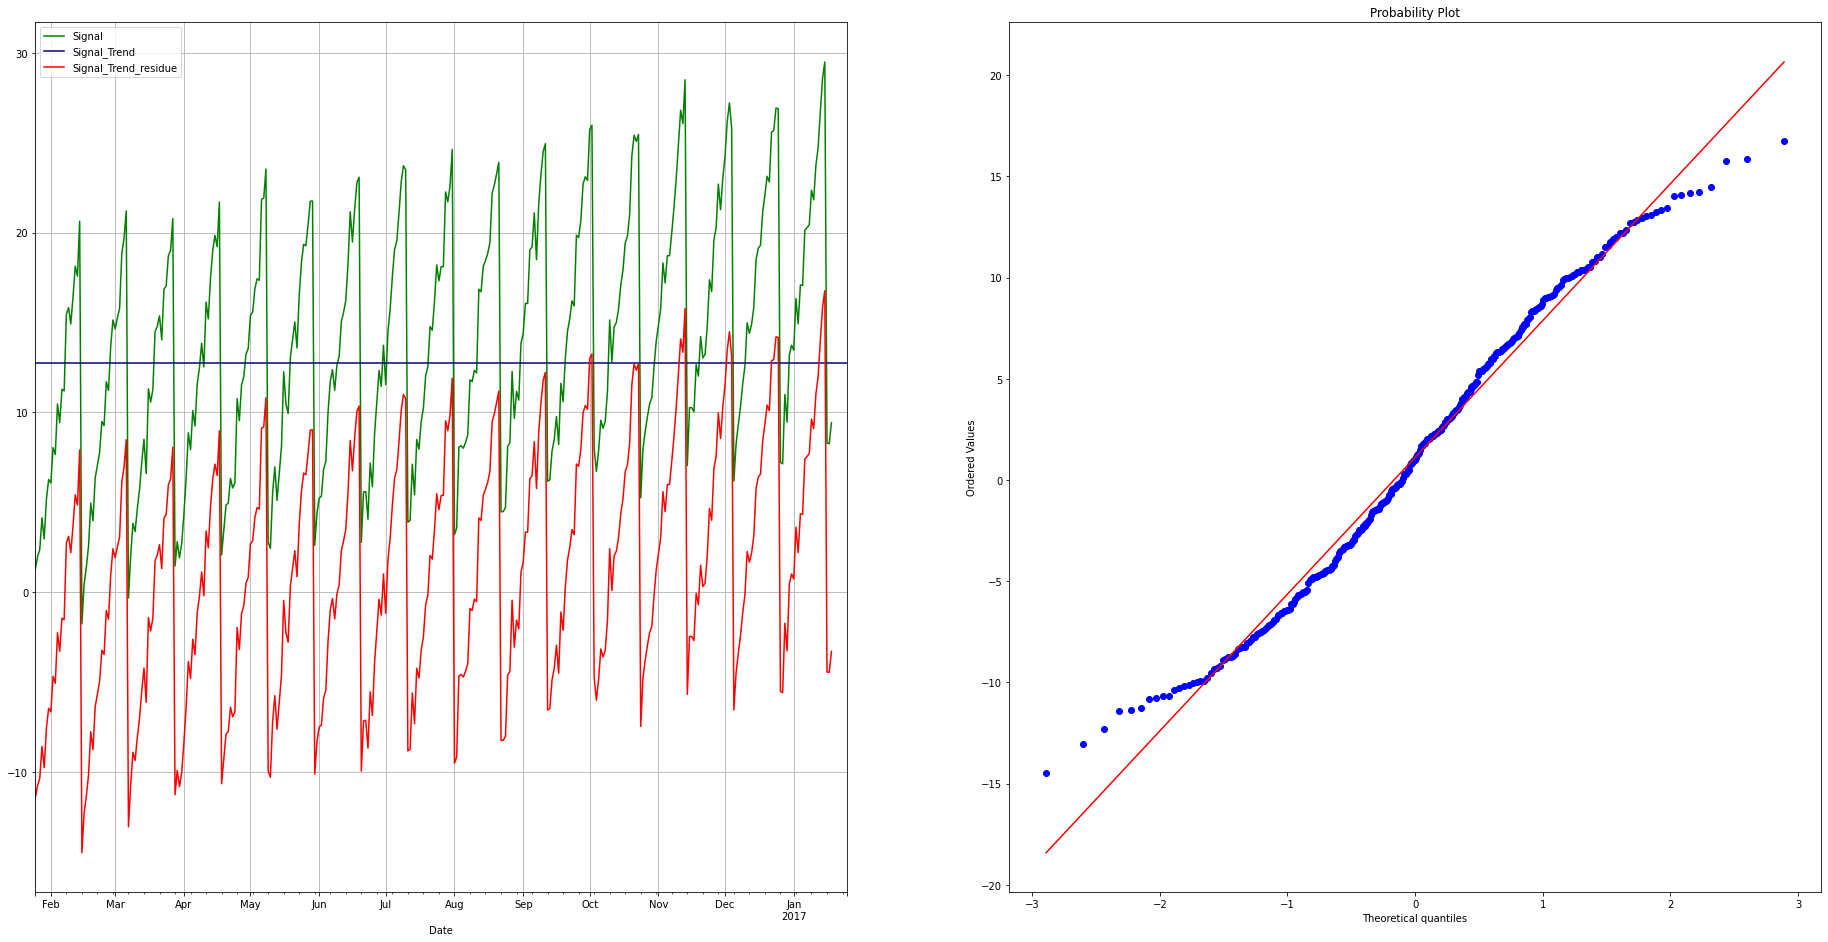

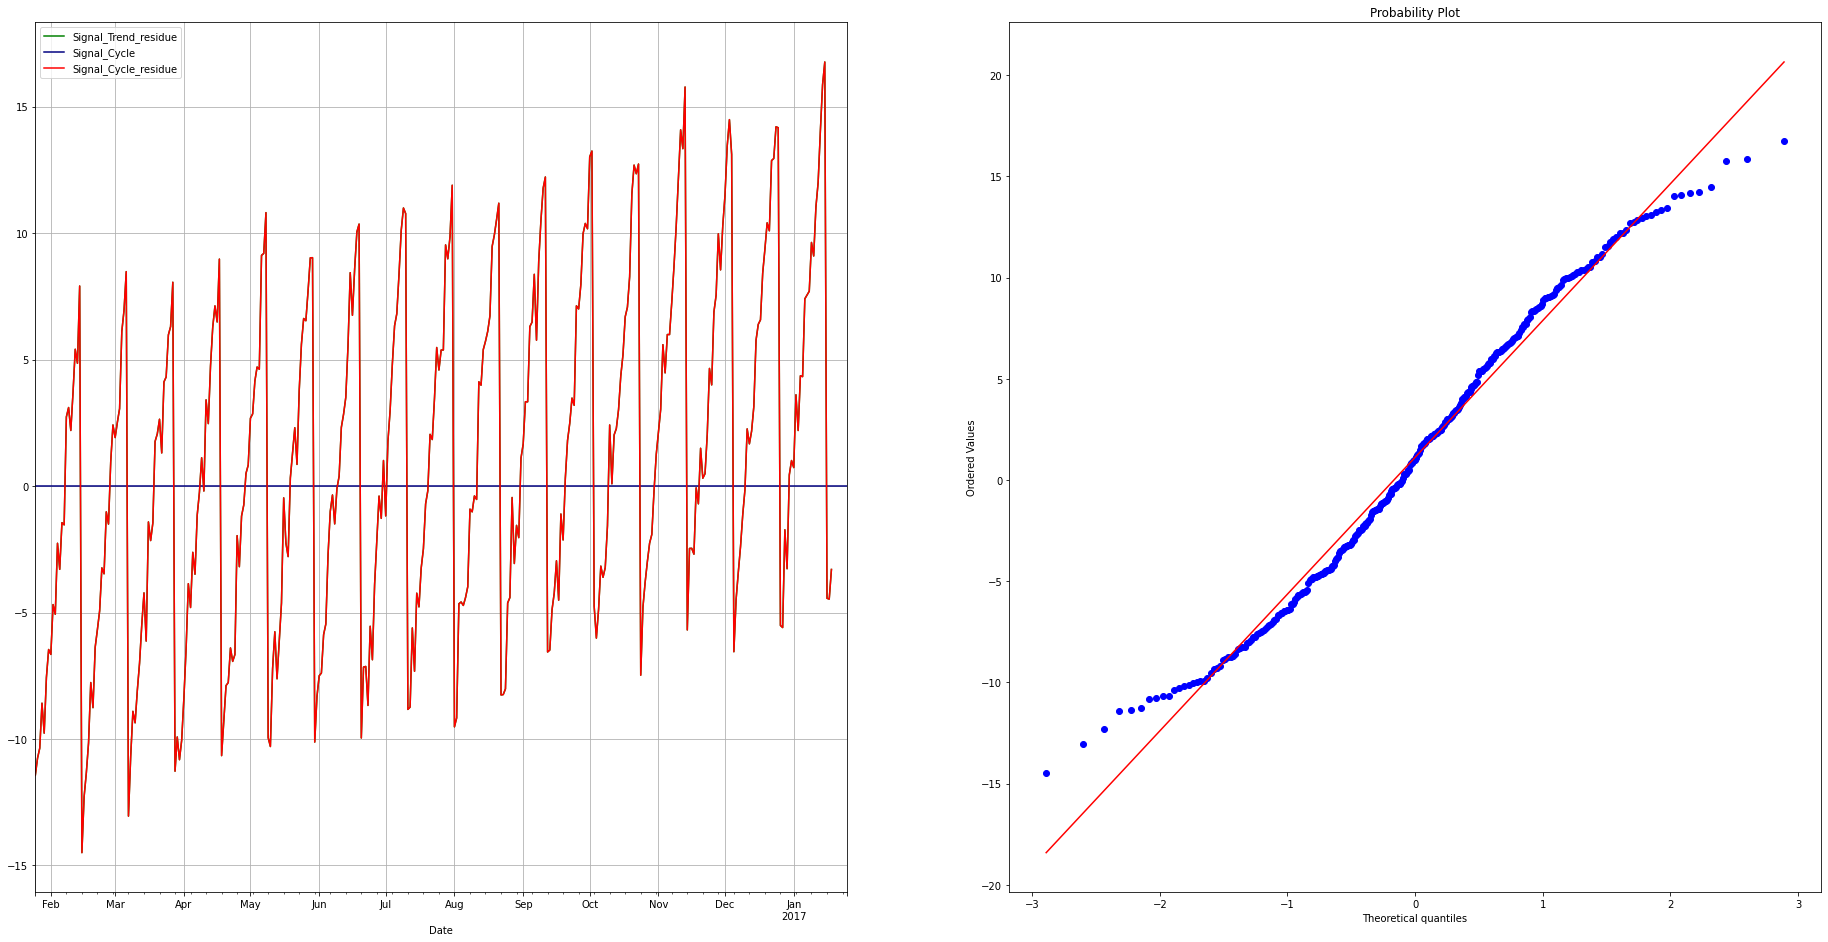

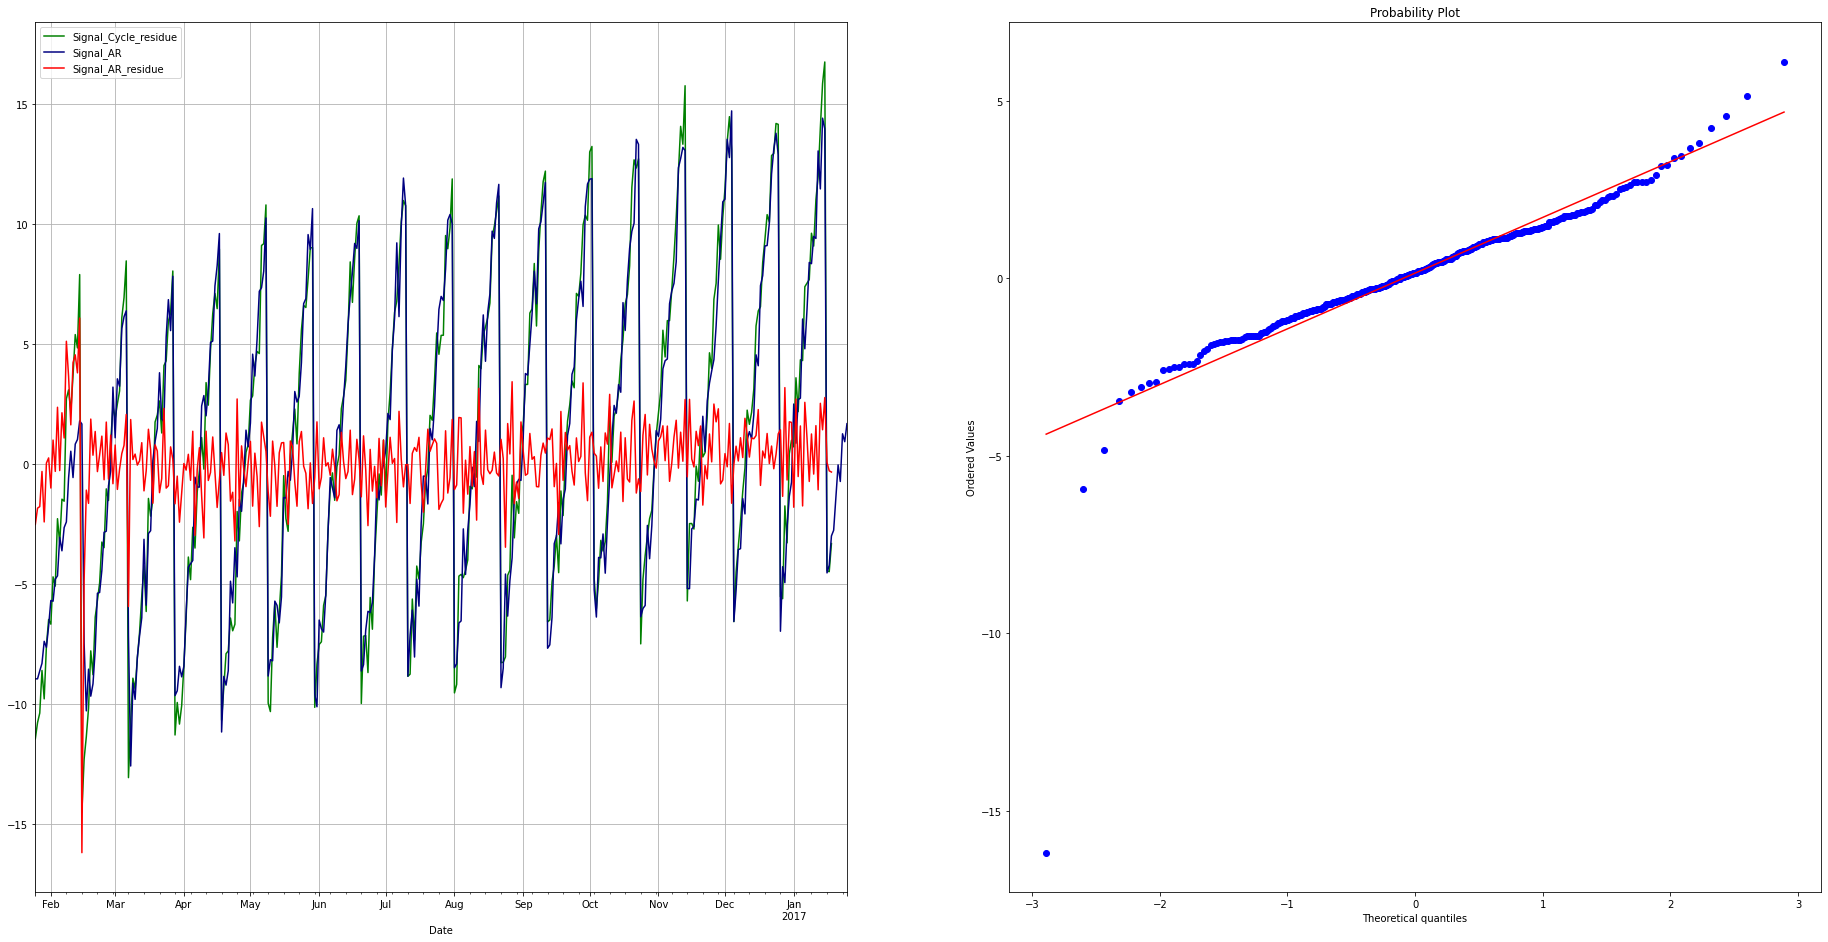

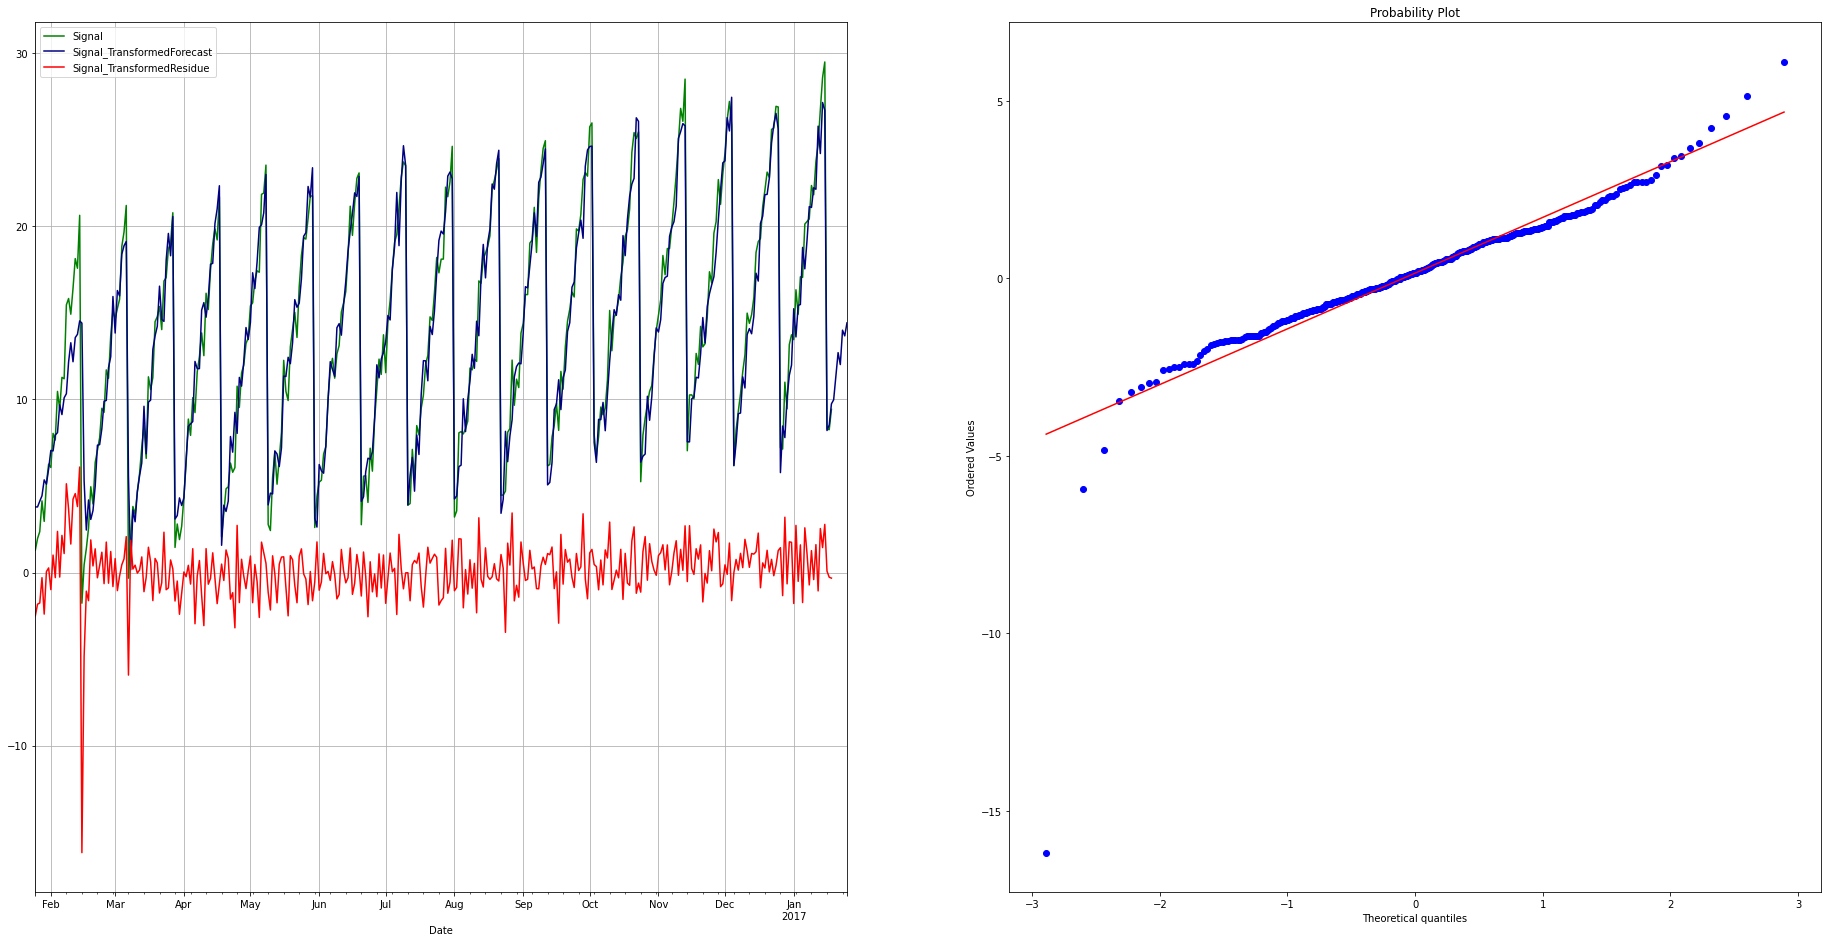

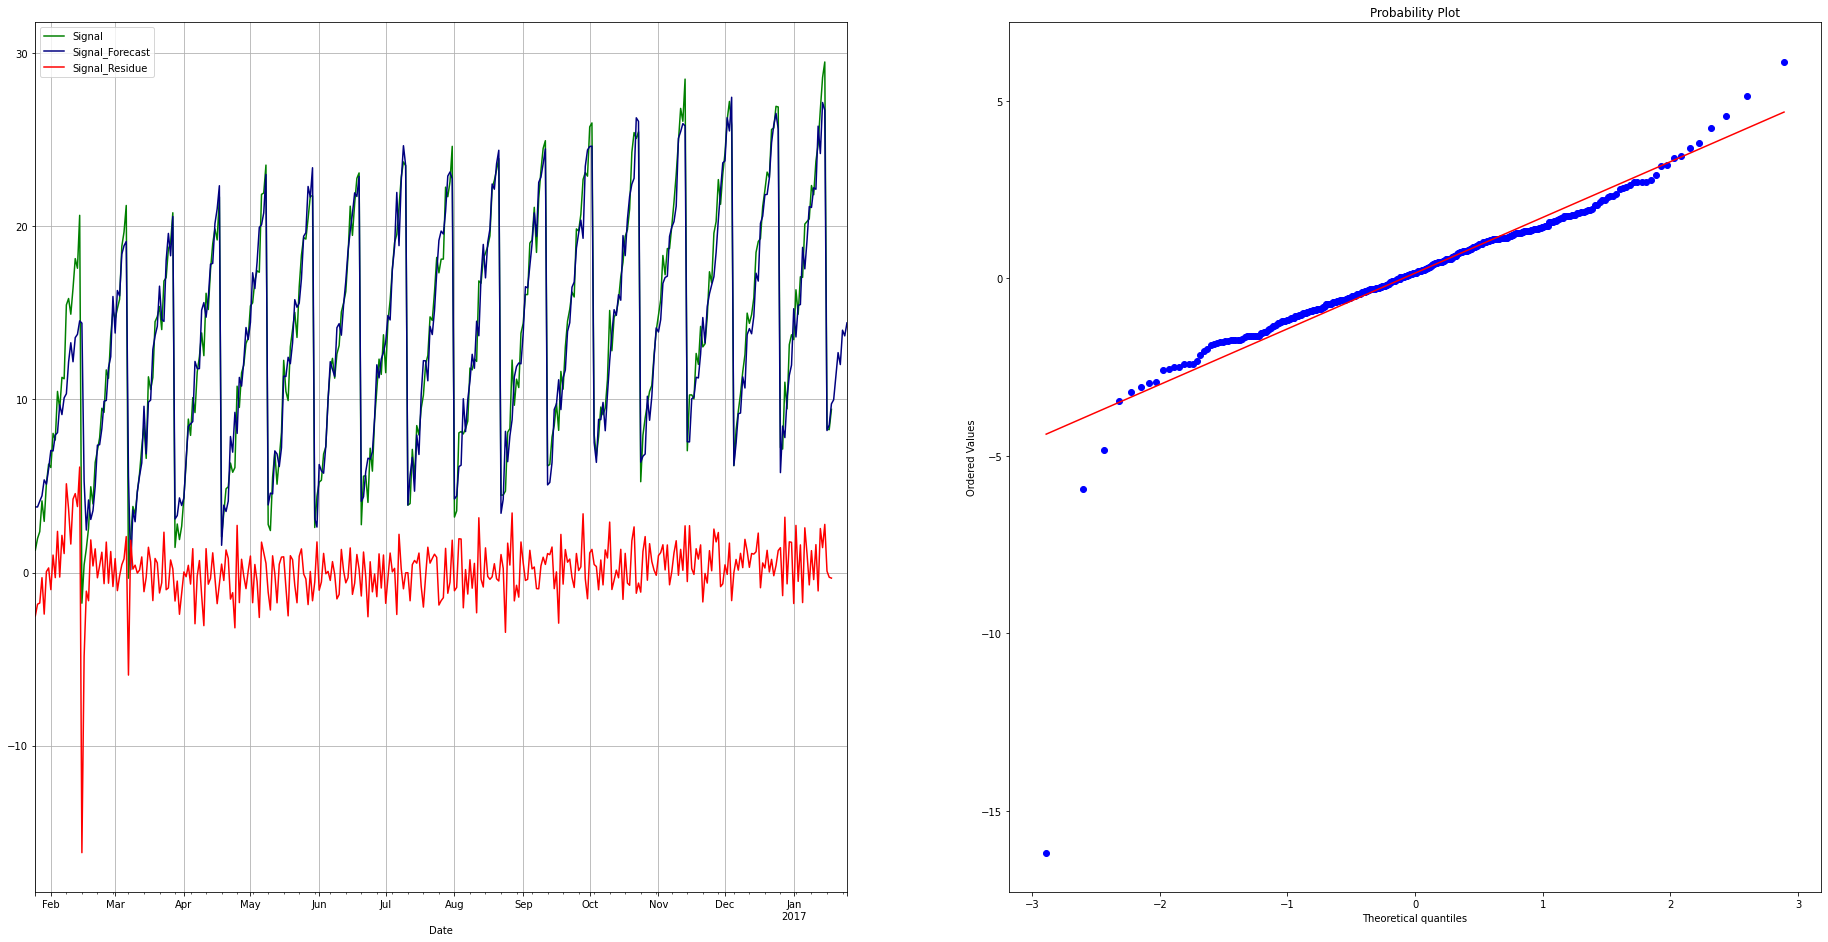

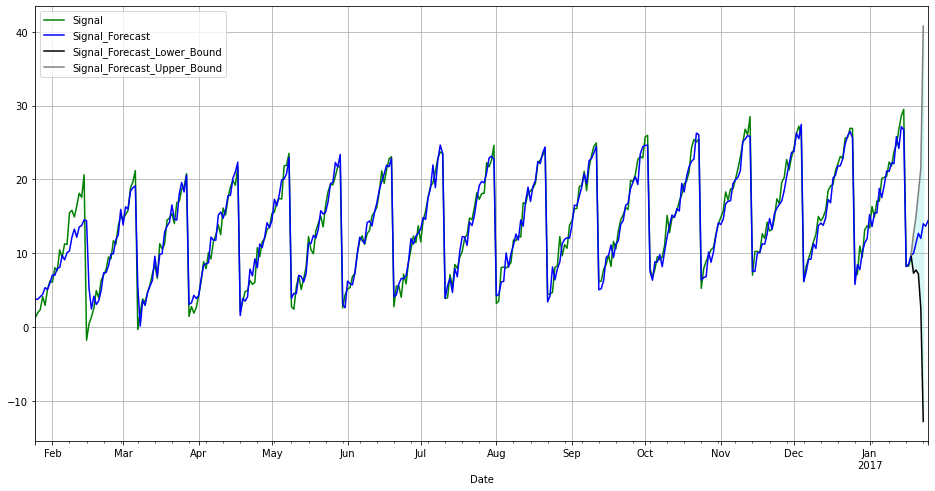

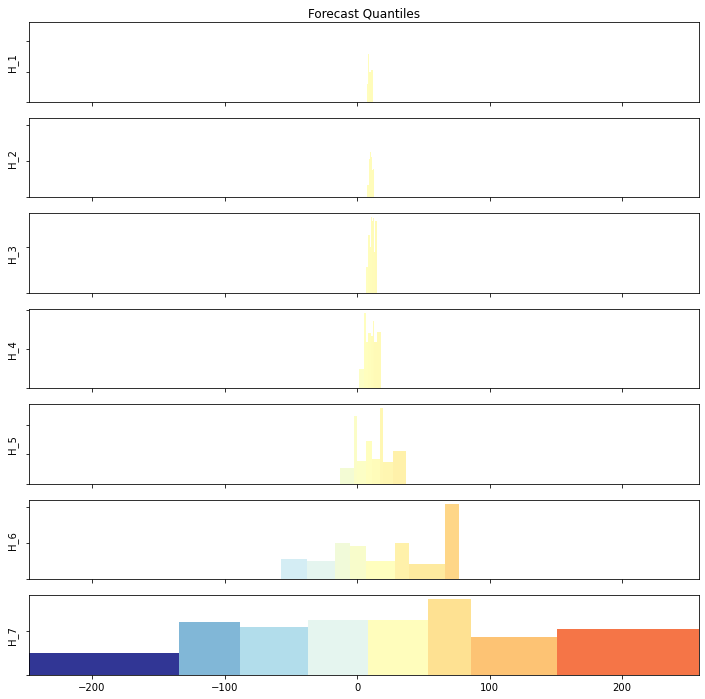

In [13]:
lEngine_reloaded.standardPlots()

In [14]:
df_forecast.describe()

,Signal,row_number,Date_Normalized,_Signal,_Signal_ConstantTrend,_Signal_ConstantTrend_residue,_Signal_ConstantTrend_residue_zeroCycle,_Signal_ConstantTrend_residue_zeroCycle_residue,_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64),_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64)_residue,...,Signal_Forecast_Upper_Bound,Signal_Forecast_Quantile_2,Signal_Forecast_Quantile_14,Signal_Forecast_Quantile_26,Signal_Forecast_Quantile_38,Signal_Forecast_Quantile_50,Signal_Forecast_Quantile_62,Signal_Forecast_Quantile_74,Signal_Forecast_Quantile_86,Signal_Forecast_Quantile_98
count,360.000000,367.000000,367.000000,360.000000,3.670000e+02,360.000000,367.0,360.000000,367.000000,360.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,13.846098,183.000000,0.651246,13.846098,1.272626e+01,1.119841,0.0,1.119841,0.949842,0.148896,...,68.785777,-42.163850,-20.446189,-10.134819,0.342269,9.503652,20.458680,27.369332,42.214522,61.386204
std,6.767808,106.088014,0.377537,6.767808,6.759371e-14,6.767808,0.0,6.767808,6.418659,1.696934,...,97.401526,93.439809,52.789159,35.587896,17.257969,1.647650,15.865107,27.644754,51.816315,89.604973
min,-1.767010,0.000000,0.000000,-1.767010,1.272626e+01,-14.493267,0.0,-14.493267,-12.565218,-16.175651,...,12.647686,-247.441303,-133.983680,-88.038188,-36.743814,6.505768,9.783768,10.072167,10.630430,11.697982
25%,8.310521,91.500000,0.325623,8.310521,1.272626e+01,-4.415736,0.0,-4.415736,-4.346410,-0.716033,...,16.565326,-35.018462,-20.179706,-8.340963,0.741950,8.767752,11.140331,11.784485,12.772688,14.204563
50%,13.782208,183.000000,0.651246,13.782208,1.272626e+01,1.055951,0.0,1.055951,0.883189,0.146087,...,21.439607,1.152174,5.590068,6.734375,8.609577,10.181987,11.940924,13.121968,14.995302,18.091137
75%,19.141298,274.500000,0.976868,19.141298,1.272626e+01,6.415040,0.0,6.415040,6.192409,1.128704,...,67.059850,6.906941,8.358033,8.814972,9.251658,10.539407,22.945343,29.604325,46.634597,56.874677
max,29.491719,366.000000,1.302491,29.491719,1.272626e+01,16.765462,0.0,16.765462,14.727540,6.096240,...,280.162796,7.365223,8.913638,9.412057,10.542903,11.223489,53.314721,85.613570,151.061348,257.755831


In [15]:
df_forecast_aftrer_reload.describe()

,Signal,row_number,Date_Normalized,_Signal,_Signal_ConstantTrend,_Signal_ConstantTrend_residue,_Signal_ConstantTrend_residue_zeroCycle,_Signal_ConstantTrend_residue_zeroCycle_residue,_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64),_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64)_residue,...,Signal_Forecast_Upper_Bound,Signal_Forecast_Quantile_2,Signal_Forecast_Quantile_14,Signal_Forecast_Quantile_26,Signal_Forecast_Quantile_38,Signal_Forecast_Quantile_50,Signal_Forecast_Quantile_62,Signal_Forecast_Quantile_74,Signal_Forecast_Quantile_86,Signal_Forecast_Quantile_98
count,360.000000,367.000000,367.000000,360.000000,3.670000e+02,360.000000,367.0,360.000000,367.000000,360.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,13.846098,183.000000,0.651246,13.846098,1.272626e+01,1.119841,0.0,1.119841,0.949842,0.148896,...,68.785777,-42.163850,-20.446189,-10.134819,0.342269,9.503652,20.458680,27.369332,42.214522,61.386204
std,6.767808,106.088014,0.377537,6.767808,6.759371e-14,6.767808,0.0,6.767808,6.418659,1.696934,...,97.401526,93.439809,52.789159,35.587896,17.257969,1.647650,15.865107,27.644754,51.816315,89.604973
min,-1.767010,0.000000,0.000000,-1.767010,1.272626e+01,-14.493267,0.0,-14.493267,-12.565218,-16.175651,...,12.647686,-247.441303,-133.983680,-88.038188,-36.743814,6.505768,9.783768,10.072167,10.630430,11.697982
25%,8.310521,91.500000,0.325623,8.310521,1.272626e+01,-4.415736,0.0,-4.415736,-4.346410,-0.716033,...,16.565326,-35.018462,-20.179706,-8.340963,0.741950,8.767752,11.140331,11.784485,12.772688,14.204563
50%,13.782208,183.000000,0.651246,13.782208,1.272626e+01,1.055951,0.0,1.055951,0.883189,0.146087,...,21.439607,1.152174,5.590068,6.734375,8.609577,10.181987,11.940924,13.121968,14.995302,18.091137
75%,19.141298,274.500000,0.976868,19.141298,1.272626e+01,6.415040,0.0,6.415040,6.192409,1.128704,...,67.059850,6.906941,8.358033,8.814972,9.251658,10.539407,22.945343,29.604325,46.634597,56.874677
max,29.491719,366.000000,1.302491,29.491719,1.272626e+01,16.765462,0.0,16.765462,14.727540,6.096240,...,280.162796,7.365223,8.913638,9.412057,10.542903,11.223489,53.314721,85.613570,151.061348,257.755831
